# Aim 1: Mismatch Compression
## Multimodal Recordings: Clinical-Grade DAQ

In this notebook we look at examples of the XLTek Clinical (epilepsy monitoring unit) DAQ.

## Setup

In [1]:
import mne
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np

import seaborn as sns
sns.set_style("white")
sns.set_context("poster")

/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/mismatch_compression/.venv/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


## Clinical-Grade Recordings

The clinical-grade DAQ is designed for small signal, specifically those that are consistent with scalp EEG measurements of epileptic activity.
They are not at all designed for recordings taken during large voltage stimulation.
As such, they're a great example of what 'bad' looks like when it comes to gain compression/saturation.

### DBS901 - 

In [2]:
def xlt_plot(pt='901',domain='TF',ds_fact=10):
    if pt == '901':
        
        file = "/home/virati/MDD_Data/OR/DBS901/DBS901.edf"
    elif pt == '903':
        file = "/home/virati/MDD_Data/OR/DBS903/DBS903.edf"
        
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    fs=1000
    #%%
    s_start = 1000*60*35
    s_len=60*10
    chann=channels.index('SGC1')
    plot_data = raw_data[chann,s_start:s_start+1000*s_len]
    #%%

    dec_ts = sig.decimate(plot_data,ds_fact)

    if domain == 'T':
        fig, ax = plt.subplots(figsize=(30,15))
        ax.plot(dec_ts)

        # inset axes....
        axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
        axins.plot(dec_ts)

        # sub region of the original image
        x1, x2, y1, y2 = 30000, 30500, 0, 0.003
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels('')
        axins.set_yticklabels('')

        ax.indicate_inset_zoom(axins)
        sns.despine(left=True)
    elif domain == 'TF':
        F,T,SG = sig.spectrogram(dec_ts,fs = fs/ds_fact,nperseg=2**10,noverlap=512,nfft=2**11,window=('blackmanharris'))
        #%%
        plt.figure(figsize=(30,15))
        plt.pcolormesh(T,F,10*np.log10(SG),cmap='jet',rasterized=True)
        sns.despine(left=True)
        
xlt_plot(domain='T')

Extracting edf Parameters from /home/virati/MDD_Data/OR/DBS901/DBS901.edf...


FileNotFoundError: [Errno 2] No such file or directory: '/home/virati/MDD_Data/OR/DBS901/DBS901.edf'

Extracting EDF parameters from /home/virati/MDD_Data/OR/DBS901/DBS901.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/virati/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


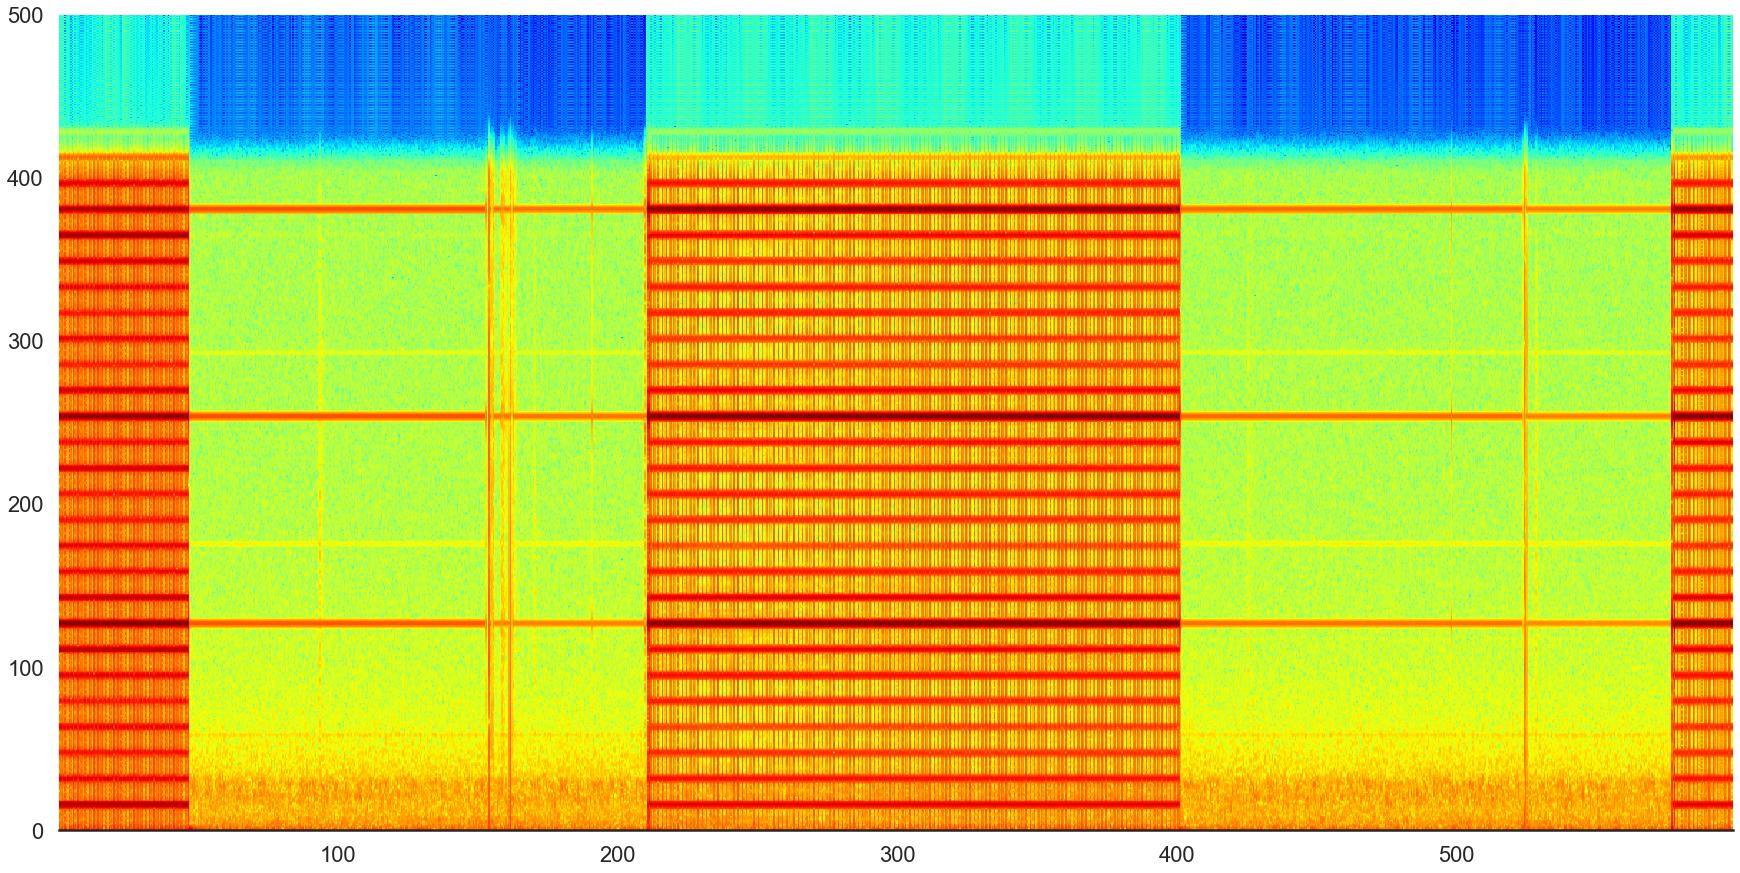

In [ ]:
xlt_plot(domain='TF',ds_fact=1)

#### DBS903 - 

Extracting EDF parameters from /home/virati/MDD_Data/OR/DBS903/DBS903.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/virati/.local/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


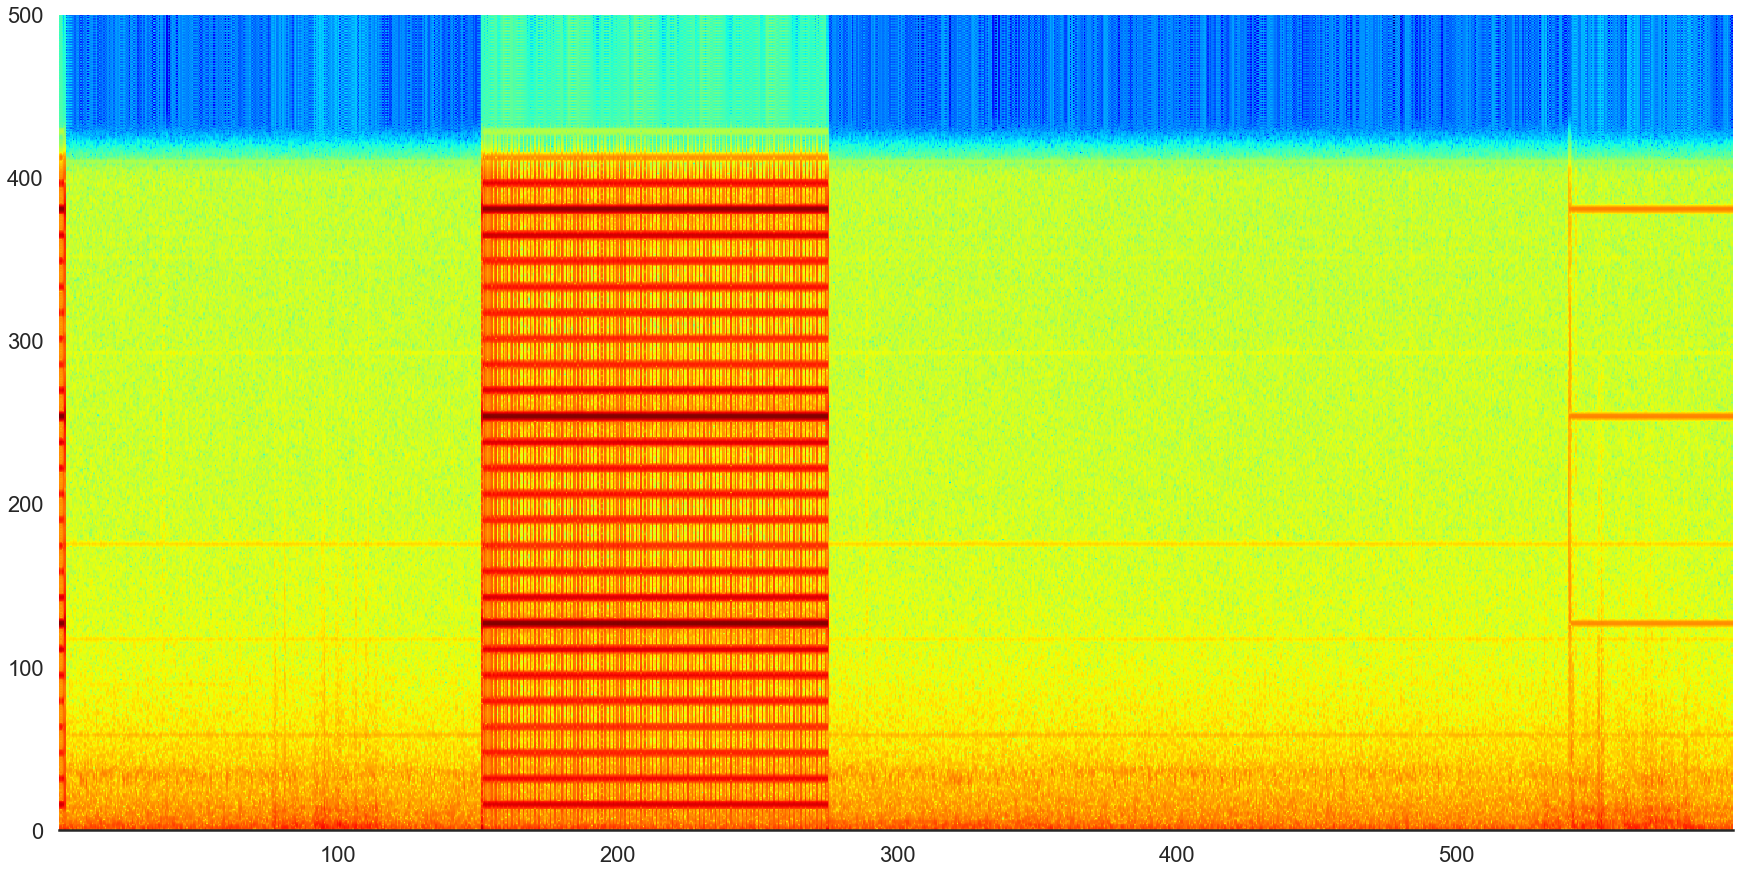

In [ ]:
xlt_plot(pt='903',domain='TF',ds_fact=1)